# Wen CNN 

Simulate the CNN approach of Wen et al. 2019.

Help SOARS students investigate properties of individual RNA

In [1]:
import time
def show_time():
    t = time.time()
    print(time.strftime('%Y-%m-%d %H:%M:%S %Z', time.localtime(t)))
show_time()

2021-08-09 17:26:37 UTC


## Transcripts  of interest
The sources of data are:  
Annotation from GenCode (GFF 9-column format).  
Links to Ensembl.org, the source of GenCode data.

### mRNA HOXA

- This transcript has length 1686: [ENST00000222718](https://useast.ensembl.org/Homo_sapiens/Transcript/Summary?db=core;g=ENSG00000105996;r=7:27096124-27099966;t=ENST00000222718)
- Transcript name is HOXA2-201
- Gene name is Homeobox A2 (gene symbol HOX1K)
- Gene [page](https://useast.ensembl.org/Homo_sapiens/Gene/Summary?db=core;g=ENSG00000105996;r=7:27096124-27099966;t=ENST00000222718)
at Ensemble says "This gene has 2 transcripts."
- HOX describes a cluster of genes 
that collectively determine timing and layout of body growth.
HOX genes are very important to all animals and plants 
in the control of their body development.

### LncRNA HOTAIR
- GenCode annotation: chr7	HAVANA	transcript	27096124	27099966	.	+	.	ID=ENST00000429611.7;Parent=ENSG00000233429.9;gene_id=ENSG00000233429.9;transcript_id=ENST00000429611.7;gene_type=lncRNA;gene_name=HOTAIRM1;transcript_type=lncRNA;transcript_name=HOTAIRM1-203;level=1;transcript_support_level=1;hgnc_id=HGNC:37117;tag=basic,exp_conf;havana_gene=OTTHUMG00000158089.4;havana_transcript=OTTHUMT00000358453.1
- Gene [page](https://useast.ensembl.org/Homo_sapiens/Gene/Summary?db=core;g=ENSG00000233429;r=7:27096124-27099966;t=ENST00000429611)
at Ensembl says "This gene has 6 transcripts."
- This transcript has length 722: [ENST00000429611](https://useast.ensembl.org/Homo_sapiens/Transcript/Summary?db=core;g=ENSG00000233429;r=7:27096124-27099966;t=ENST00000429611) 
- Gene name is "HOTAIRM1: HOXA Transcript Antisense RNA, myeloid-specific 1".
The name tells us this lncRNA is transcribed from the opposite strand 
(reverse complement) of the protein-coding HOXA gene.
- Genome location is 7p15.2 (short arm of chr 7)

### mRNA APOA
- GenCode annotation: chr11	HAVANA	transcript	116835751	116837586	.	-	.	ID=ENST00000375320.5;Parent=ENSG00000118137.10;gene_id=ENSG00000118137.10;transcript_id=ENST00000375320.5;gene_type=protein_coding;gene_name=APOA1;transcript_type=protein_coding;transcript_name=APOA1-203;level=2;protein_id=ENSP00000364469.1;transcript_support_level=3;hgnc_id=HGNC:600;tag=alternative_5_UTR,basic,appris_principal_1,CCDS;ccdsid=CCDS8378.1;havana_gene=OTTHUMG00000046112.5;havana_transcript=OTTHUMT00000142222.1
- Gene [page](https://useast.ensembl.org/Homo_sapiens/Gene/Summary?db=core;g=ENSG00000118137;r=11:116835751-116837622;t=ENST00000375320)
at Ensemble says "This gene has 5 transcripts."
- This transcript has length 940: [ENST00000375320](https://useast.ensembl.org/Homo_sapiens/Transcript/Summary?db=core;g=ENSG00000118137;r=11:116835751-116837622;t=ENST00000375320)
- Gene name is Apolipoprotein A1
- The protein from the Apolipoprotein A1 gene is implicated in Alzheimer's disease.

### LncRNA APOA1-AS
- GenCode annotation: chr11	HAVANA	transcript	116836166	116856018	.	+	.	ID=ENST00000669664.1;Parent=ENSG00000235910.2;gene_id=ENSG00000235910.2;transcript_id=ENST00000669664.1;gene_type=lncRNA;gene_name=APOA1-AS;transcript_type=lncRNA;transcript_name=APOA1-AS-202;level=2;hgnc_id=HGNC:40079;tag=basic,Ensembl_canonical,TAGENE;havana_gene=OTTHUMG00000150649.2;havana_transcript=OTTHUMT00000524029.1
- Gene [page](https://useast.ensembl.org/Homo_sapiens/Gene/Summary?db=core;g=ENSG00000235910;r=11:116836166-116856018;t=ENST00000669664)
at Ensembl says "This gene has 2 transcripts."
- This transcript has length 956: [ENST00000669664](https://useast.ensembl.org/Homo_sapiens/Transcript/Summary?db=core;g=ENSG00000235910;r=11:116836166-116856018;t=ENST00000669664)
- Gene name is "APOA1 antisense RNA".
The name tells us this lncRNA is transcribed from the opposite strand
(reverse complement) of the protein-coding APOA1 gene.
- Genome location is 11q23.3 (long arm of chr 11)


In [2]:
selectedX=[]
selectedY=[]
#>ENST00000222718.7|ENSG00000105996.7|OTTHUMG00000023208.7|OTTHUMT00000358508.4|HOXA2-201|HOXA2|1686|UTR5:1-183|CDS:184-1314|UTR3:1315-1686|
selectedX.append('AGTTTAATAGTAGCGCGGTCCCCATACGGCTGTAATCAGTGAATTAGAAAAAAAACACCCTAGCAGCGATATTCTATGATAGATTTTTTTTCCTCTGCGCTCGCCTTTTTCCTAGGCCTTGCCCCCCCAAAGCCCCTCCAAAAGAGGGAACTTTTTCTCTGAGGGGGCTCCAAGGAGAAGGCCATGAATTACGAATTTGAGCGAGAGATTGGTTTTATCAATAGCCAGCCGTCGCTCGCTGAGTGCCTGACATCTTTTCCCCCTGTCGCTGATACATTTCAAAGTTCATCAATCAAGACCTCGACGCTTTCACACTCGACACTGATTCCTCCTCCTTTTGAGCAGACCATTCCCAGCCTGAACCCCGGCAGTCACCCTCGCCACGGCGCTGGCGGCCGCCCCAAGCCGAGCCCCGCGGGCAGCCGCGGCAGCCCGGTGCCCGCCGGCGCCCTGCAGCCGCCCGAGTACCCCTGGATGAAGGAGAAGAAGGCGGCCAAGAAAACCGCACTTCTGCCGGCCGCCGCCGCCGCCGCCACCGCCGCAGCCACCGGCCCTGCTTGCCTCAGCCACAAAGAATCCCTGGAAATCGCCGATGGCAGCGGCGGGGGATCGCGGCGCCTGAGAACTGCTTACACCAACACACAGCTTCTAGAGCTGGAAAAAGAATTTCATTTCAACAAGTACCTTTGCAGACCCCGAAGGGTGGAGATTGCAGCGCTGCTGGATTTGACTGAGAGACAAGTGAAAGTGTGGTTTCAGAACCGGAGGATGAAGCACAAGAGGCAGACCCAGTGCAAGGAAAACCAAAACAGCGAAGGGAAATGTAAAAGCCTTGAGGACTCCGAGAAAGTAGAGGAGGACGAGGAAGAGAAGACGCTCTTTGAGCAAGCCCTTAGCGTCTCTGGGGCCCTTCTGGAGAGGGAAGGCTACACTTTTCAGCAAAATGCCCTCTCTCAGCAGCAGGCTCCCAATGGACACAATGGCGACTCCCAAAGTTTCCCAGTCTCGCCTTTAACCAGCAATGAGAAAAATCTGAAACATTTTCAGCACCAGTCACCCACTGTTCCCAACTGCTTGTCAACAATGGGCCAGAACTGTGGAGCTGGCCTAAACAATGACAGTCCTGAGGCCCTTGAGGTCCCCTCTTTGCAGGACTTTAGCGTTTTCTCCACAGATTCCTGCCTGCAGCTTTCAGATGCAGTTTCACCCAGTTTGCCAGGTTCCCTCGACAGTCCCGTAGATATTTCAGCTGACAGCTTAGACTTTTTTACAGACACACTCACCACAATCGACTTGCAGCATCTGAATTACTAAAAACATTAAAGCAAAACAAAGCATCACCAAACAAAAACTCCTTTGACCAGGTGGTTTTGCCTTCTTTTATTTGGGAGTTTATTTTTTATTTTCTTCTTGACCTACCCCTTCCCTCCTTTAAGTGTTGAGGATTTTCTGTTTAGTGATTCCCTGACCCAGTTTCAAACAGAGCCATCTTTTACAGATTATTTTGGAGTTTTAGTTGTTTTAAACCTAACTCAACAACCCTTTATGTGATTCCTGAGAGCAGTATGAGGCCTGCAAGAAAGTGATCATATAATTGTATCTTCACTTTCTTTTTATTTTTGTATTACATTGGGATGCATTGTCATGCATATTTTTTGTAGAATAAATTCTCCTTTGCTATAAGTA')
selectedY.append(1) # coding
#>ENST00000429611.7|ENSG00000233429.9|OTTHUMG00000158089.4|OTTHUMT00000358453.1|HOTAIRM1-203|HOTAIRM1|722|
selectedX.append('CACCGTTTTAGTGGCATTTAAATCCCCGGCGCTCCGCCGTCTAGGTGACGCGCAGTCGCCCCCCCAGGCAGCCTAGGCGGCGGCAGCTGCTGCGGCGACTGCAAAGGCCGATTTGGAGTGCTGGAGCGAAGAAGAGCAAAAGCTGCGTTCTGCGCGCGCCCGACTCCGCTGCCCGCCCCGCCAGGCCTCCGGGAGGTGGGGGCTGGGAGGCGTCCCCCGCTCCCGCCCCCTCCCCACCGTTCAATGAAAGATGAACTGGCGAGAGGACGAATCGCATCCAGGAGCTGCGCAGCCCTGGCCGCTGCCGGGACGCCCTGCTCCGCGCTGAGCTTGGGGCCAGAAACCAGCCATAGTCCCCACACTCCGCCGCCGCAGCTGAGATTTAGCGGAGGAAGGGGCGAGGGAAGGTAGGGAGCAAACCTATGAAGAAACATCGCGTTGTCATTGGAACTTCCAAGCCTTTGCTGTTAAGAGCCAGGTTCTTAAATCAACCCGCCCCACACACATGTTGCTTACATGCTGCGTTTTCTCACGGTCTGTTTTGCCTGAACCCATCAACAGCTGGGAGATTAATCAACCACACTGAAAATGTGGAGGGATTTATGGGGGAGGGGGTTGAAATGTGGGTGTTTGAAACAAAAGTGTATAAACAAATGAATTGTTGATAACTTAGTTATTGACCTGGAGACTGGTAGCTTATTAAAGAAACTCCGTGTTACTCA')
selectedY.append(0) # noncoding
#>ENST00000375320.5|ENSG00000118137.10|OTTHUMG00000046112.5|OTTHUMT00000142222.1|APOA1-203|APOA1|940|UTR5:1-79|CDS:80-883|UTR3:884-940|
selectedX.append('CCCGGTCACTCTGGCTCCCCAGCTCAAGGTTCAGGCCTTGCCCCAGGCCGGGCCTCTGGGTCCCCCACGGCCCTTCAGGATGAAAGCTGCGGTGCTGACCTTGGCCGTGCTCTTCCTGACGGGGAGCCAGGCTCGGCATTTCTGGCAGCAAGATGAACCCCCCCAGAGCCCCTGGGATCGAGTGAAGGACCTGGCCACTGTGTACGTGGATGTGCTCAAAGACAGCGGCAGAGACTATGTGTCCCAGTTTGAAGGCTCCGCCTTGGGAAAACAGCTAAACCTAAAGCTCCTTGACAACTGGGACAGCGTGACCTCCACCTTCAGCAAGCTGCGCGAACAGCTCGGCCCTGTGACCCAGGAGTTCTGGGATAACCTGGAAAAGGAGACAGAGGGCCTGAGGCAGGAGATGAGCAAGGATCTGGAGGAGGTGAAGGCCAAGGTGCAGCCCTACCTGGACGACTTCCAGAAGAAGTGGCAGGAGGAGATGGAGCTCTACCGCCAGAAGGTGGAGCCGCTGCGCGCAGAGCTCCAAGAGGGCGCGCGCCAGAAGCTGCACGAGCTGCAAGAGAAGCTGAGCCCACTGGGCGAGGAGATGCGCGACCGCGCGCGCGCCCATGTGGACGCGCTGCGCACGCATCTGGCCCCCTACAGCGACGAGCTGCGCCAGCGCTTGGCCGCGCGCCTTGAGGCTCTCAAGGAGAACGGCGGCGCCAGACTGGCCGAGTACCACGCCAAGGCCACCGAGCATCTGAGCACGCTCAGCGAGAAGGCCAAGCCCGCGCTCGAGGACCTCCGCCAAGGCCTGCTGCCCGTGCTGGAGAGCTTCAAGGTCAGCTTCCTGAGCGCTCTCGAGGAGTACACTAAGAAGCTCAACACCCAGTGAGGCGCCCGCCGCCGCCCCCCTTCCCGGTGCTCAGAATAAACGTTTCCAAAGTGGGAA')
selectedY.append(1) # coding
#>ENST00000669664.1|ENSG00000235910.2|OTTHUMG00000150649.2|OTTHUMT00000524029.1|APOA1-AS-202|APOA1-AS|956|
selectedX.append('TCTGCGCGCAGCGGCTCCACCTTCTGGCGGTAGAGCTCCATCTCCTCCTGCCACTTCTTCTGGAAGTCGTCCAGGGTGGCAGGCAGGGAGATTACGGACAGCATGGGGCATGTGAAATCCTGACACTTCTACAAATTGGGAAGAAACCTTTGGCATGCTGCCTGCTTAGTGCTCTCACAGTGCCTGGCCTCATACTGGCTGGTGGCAAATCGCCATCAAGGAAATAGATCCAAATGGCAAACCTTCTTCATCCACCAGGACCCAACCCACAGGCTACTTATTGCTGGAAACCTACGTTGTTCCTTGGATTGAAGTAATCTCTCCCTCCTCTGGTGCGCCCACAGCACTTGCACCAACAGTGGGTACTCAACAGACTAGCGTGCCTGCCGAAGAAGGGGTCCTCTGACAATCAGGGGACAATGGGGAATTATGCTCTCCAGACTTTCTACACACACAAGTCACACAGGAAGGAAGGTAAAGAGAAACTAGAGAAAATAATTTTTGAAGAAAAACATTTCAGGAAGTATTGAAAGTACACGGTAACTCAGCCTGGGGCAGGGGTGGAGGGCAGCAGCACTGTTTGCTGCAGCTATGCTCCTTCCTCAGTGCCCTGCACACCCGGGACTTGCTCGGTGAGCATCTCTCGTGTCAGTGACAGCTAGTGTGAGTACTCTTATGTTCAGCTGCCCCTGACTACCTCTTGACTTTGGGGACAAGTTACTTAATCTCTGTGCCTCCGCTGTTTCACTGGTAAATGGGAATAAGAGTTGGTTATTCTAGGGTTGTAGGGTTGTTGTAAGGATTAAATGAATCCGTATGTGAACAGCATTTGGTGCCTGGCACATGTGAGCTCAGCCGGGCGCGGTGGCTCATGCCTGTAATCCCAGCACTTTGGGAGGCCAAGGCGTGCGGATCACGAGGTCAGGAGATCGAGACCATCCTGGCTAACACGGTGA')
selectedY.append(0) # noncoding


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Dense,Embedding,Dropout
from keras.layers import Flatten,TimeDistributed
from keras.losses import BinaryCrossentropy
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [4]:
import sys
IN_COLAB = False
try:
    from google.colab import drive
    IN_COLAB = True
except:
    pass
if IN_COLAB:
    print("On Google CoLab, mount cloud-local file, get our code from GitHub.")
    PATH='/content/drive/'
    #drive.mount(PATH,force_remount=True)  # hardly ever need this
    drive.mount(PATH)    # Google will require login credentials
    DATAPATH=PATH+'My Drive/data/'  # must end in "/"
    import requests
    r = requests.get('https://raw.githubusercontent.com/ShepherdCode/Soars2021/master/SimTools/RNA_describe.py')
    with open('RNA_describe.py', 'w') as f:
        f.write(r.text)  
    from RNA_describe import ORF_counter
    r = requests.get('https://raw.githubusercontent.com/ShepherdCode/Soars2021/master/SimTools/GenCodeTools.py')
    with open('GenCodeTools.py', 'w') as f:
        f.write(r.text)  
    from GenCodeTools import GenCodeLoader
    r = requests.get('https://raw.githubusercontent.com/ShepherdCode/Soars2021/master/SimTools/KmerTools.py')
    with open('KmerTools.py', 'w') as f:
        f.write(r.text)  
    from KmerTools import KmerTools
    r = requests.get('https://raw.githubusercontent.com/ShepherdCode/Soars2021/master/SimTools/plot_generator.py')
    with open ('plot_generator.py', 'w') as f:
        f.write(r.text)
    from plot_generator import PlotGenerator
else:
        print("CoLab not working. On my PC, use relative paths.")
        DATAPATH='data/'  # must end in "/"
        sys.path.append("..") # append parent dir in order to use sibling dirs
        from SimTools.RNA_describe import ORF_counter
        from SimTools.GenCodeTools import GenCodeLoader
        from SimTools.KmerTools import KmerTools
        from SimTools.plot_generator import PlotGenerator
BESTMODELPATH=DATAPATH+"BestModel"  # saved on cloud instance and lost after logout
LASTMODELPATH=DATAPATH+"LastModel"  # saved on Google Drive but requires login

On Google CoLab, mount cloud-local file, get our code from GitHub.
Mounted at /content/drive/


## Data Load

In [5]:
PC_TRAINS=8000
NC_TRAINS=8000
PC_TESTS=2000
NC_TESTS=2000   
PC_LENS=(200,4000)
NC_LENS=(200,4000)   # Wen used 3500 for hyperparameter, 3000 for train
PC_FILENAME='gencode.v38.pc_transcripts.fa.gz'
NC_FILENAME='gencode.v38.lncRNA_transcripts.fa.gz'
PC_FULLPATH=DATAPATH+PC_FILENAME
NC_FULLPATH=DATAPATH+NC_FILENAME
MAX_K = 3 
# With K={1,2,3}, num K-mers is 4^3 + 4^2 + 4^1 = 84.
# Wen specified 17x20 which is impossible.
# The factors of 84 are 1, 2, 3, 4, 6, 7, 12, 14, 21, 28, 42 and 84.
FRQ_CNT=84
ROWS=7
COLS=FRQ_CNT//ROWS
SHAPE2D = (ROWS,COLS,1)
EPOCHS=50 # 1000 # 200
SPLITS=5
FOLDS=5   # make this 5 for serious testing
show_time()

2021-08-09 17:27:12 UTC


In [6]:
loader=GenCodeLoader()
loader.set_label(1)
loader.set_check_utr(True)
pcdf=loader.load_file(PC_FULLPATH)
print("PC seqs loaded:",len(pcdf))
loader.set_label(0)
loader.set_check_utr(False)
ncdf=loader.load_file(NC_FULLPATH)
print("NC seqs loaded:",len(ncdf))
show_time()

PC seqs loaded: 70825
NC seqs loaded: 48752
2021-08-09 17:27:18 UTC


In [7]:
def dataframe_length_filter(df,low_high):
    (low,high)=low_high
    # The pandas query language is strange, 
    # but this is MUCH faster than loop & drop.
    return df[ (df['seqlen']>=low) & (df['seqlen']<=high) ]
def dataframe_extract_sequence(df):
    return df['sequence'].tolist()

pc_all = dataframe_extract_sequence(
    dataframe_length_filter(pcdf,PC_LENS))
nc_all = dataframe_extract_sequence(
    dataframe_length_filter(ncdf,NC_LENS))

show_time()
print("PC seqs pass filter:",len(pc_all))
print("NC seqs pass filter:",len(nc_all))
# Garbage collection to reduce RAM footprint
pcdf=None
ncdf=None

2021-08-09 17:27:18 UTC
PC seqs pass filter: 55381
NC seqs pass filter: 46919


## Data Prep

In [8]:
pc_train=pc_all[:PC_TRAINS] 
nc_train=nc_all[:NC_TRAINS]
print("PC train, NC train:",len(pc_train),len(nc_train))
pc_test=pc_all[PC_TRAINS:PC_TRAINS+PC_TESTS] 
nc_test=nc_all[NC_TRAINS:NC_TRAINS+PC_TESTS]
print("PC test, NC test:",len(pc_test),len(nc_test))
# Garbage collection
pc_all=None
nc_all=None

PC train, NC train: 8000 8000
PC test, NC test: 2000 2000


In [9]:
def prepare_x_and_y(seqs1,seqs0):
    len1=len(seqs1)
    len0=len(seqs0)
    total=len1+len0
    L1=np.ones(len1,dtype=np.int8)
    L0=np.zeros(len0,dtype=np.int8)
    S1 = np.asarray(seqs1)
    S0 = np.asarray(seqs0)
    all_labels = np.concatenate((L1,L0))
    all_seqs = np.concatenate((S1,S0))  
    # interleave (uses less RAM than shuffle)
    for i in range(0,len0):
        all_labels[i*2] = L0[i]
        all_seqs[i*2] = S0[i]
        all_labels[i*2+1] = L1[i]
        all_seqs[i*2+1] = S1[i]
    return all_seqs,all_labels  # use this to test unshuffled
    X,y = shuffle(all_seqs,all_labels) # sklearn.utils.shuffle 
    return X,y


In [10]:
Xseq,y=prepare_x_and_y(pc_train,nc_train)
#print(Xseq[:3])
#print(y[:3])
show_time()

2021-08-09 17:27:19 UTC


In [11]:
def seqs_to_kmer_freqs(seqs,max_K):
    tool = KmerTools()  # from SimTools
    collection = []
    for seq in seqs:
        counts = tool.make_dict_upto_K(max_K)
        # Last param should be True when using Harvester.
        counts = tool.update_count_one_K(counts,max_K,seq,True)
        # Given counts for K=3, Harvester fills in counts for K=1,2.
        counts = tool.harvest_counts_from_K(counts,max_K)
        fdict = tool.count_to_frequency(counts,max_K)
        freqs = list(fdict.values())
        collection.append(freqs)
    return np.asarray(collection)
Xfrq=seqs_to_kmer_freqs(Xseq,MAX_K)
# Garbage collection
Xseq = None
show_time()

2021-08-09 17:27:31 UTC


In [12]:
def reshape(frequency_matrix):
    seq_cnt,frq_cnt=Xfrq.shape 
    # CNN inputs require a last dimension = numbers per pixel.
    # For RGB images it is 3.
    # For our frequency matrix it is 1.
    new_matrix = frequency_matrix.reshape(seq_cnt,ROWS,COLS,1)
    return new_matrix

print("Xfrq")
print("Xfrq type",type(Xfrq))
print("Xfrq shape",Xfrq.shape)
Xfrq2D = reshape(Xfrq)
print("Xfrq2D shape",Xfrq2D.shape)

Xfrq
Xfrq type <class 'numpy.ndarray'>
Xfrq shape (16000, 84)
Xfrq2D shape (16000, 7, 12, 1)


## Build and train a neural network

In [13]:
def make_DNN(shape):
    dt=np.float32
    print("make_DNN")
    print("input shape:",shape)
    WIDTH=(3,3)
    STRIDE=(1,1)
    dnn = Sequential()
    dnn.add(Conv2D(filters=32,kernel_size=WIDTH,strides=STRIDE,activation="relu",padding="same",
            input_shape=shape))
    dnn.add(Conv2D(filters=64,kernel_size=WIDTH,strides=STRIDE,activation="relu",padding="same"))
    dnn.add(MaxPooling2D())
    dnn.add(Flatten())
    dnn.add(Dropout(0.25))
    dnn.add(Dense(128,activation="sigmoid",dtype=dt)) 
    dnn.add(Dropout(0.50))
    dnn.add(Dense(1,activation="sigmoid",dtype=dt))   
    dnn.compile(optimizer='adam',    # adadelta doesn't work as well
                loss=BinaryCrossentropy(from_logits=False),
                metrics=['accuracy'])   # add to default metrics=loss
    dnn.build(input_shape=shape) 
    return dnn
model = make_DNN(SHAPE2D)
print(model.summary())

make_DNN
input shape: (7, 12, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 7, 12, 32)         320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 12, 64)         18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               147584    
_________________________________________________________________
dropout_1 (Dropout)    

In [14]:
def do_cross_validation(X,y,shape):
    cv_scores = []
    fold=0
    mycallbacks = [ModelCheckpoint(
        filepath=BESTMODELPATH, save_best_only=True, 
        monitor='val_accuracy', mode='max')]   
    # When shuffle=True, the valid indices are a random subset.
    splitter = KFold(n_splits=SPLITS,shuffle=True) 
    model = None
    for train_index,valid_index in splitter.split(X):
        if fold < FOLDS:
            fold += 1
            X_train=X[train_index] # inputs for training
            y_train=y[train_index] # labels for training
            X_valid=X[valid_index] # inputs for validation
            y_valid=y[valid_index] # labels for validation
            print("MODEL")
            # Call constructor on each CV. Else, continually improves the same model.
            model = model = make_DNN(shape)
            print("FIT")  # model.fit() implements learning
            start_time=time.time()
            history=model.fit(X_train, y_train, 
                    epochs=EPOCHS, 
                    verbose=1,  # ascii art while learning
                    callbacks=mycallbacks,   # called at end of each epoch
                    validation_data=(X_valid,y_valid))
            end_time=time.time()
            elapsed_time=(end_time-start_time)                        
            print("Fold %d, %d epochs, %d sec"%(fold,EPOCHS,elapsed_time))
            # print(history.history.keys())  # all these keys will be shown in figure
            pd.DataFrame(history.history).plot(figsize=(8,5))
            plt.grid(True)
            plt.gca().set_ylim(0,1) # any losses > 1 will be off the scale
            plt.show()
    return model  # parameters at end of training

2021-08-09 17:27:37 UTC
MODEL
make_DNN
input shape: (7, 12, 1)
FIT
Epoch 1/50
400/400 [==============================] - 46s 5ms/step - loss: 0.7191 - accuracy: 0.5409 - val_loss: 0.6236 - val_accuracy: 0.6419
INFO:tensorflow:Assets written to: /content/drive/My Drive/data/BestModel/assets
Epoch 2/50
400/400 [==============================] - 1s 3ms/step - loss: 0.6249 - accuracy: 0.6531 - val_loss: 0.5698 - val_accuracy: 0.7059
INFO:tensorflow:Assets written to: /content/drive/My Drive/data/BestModel/assets
Epoch 3/50
400/400 [==============================] - 1s 3ms/step - loss: 0.5735 - accuracy: 0.7087 - val_loss: 0.5225 - val_accuracy: 0.7425
INFO:tensorflow:Assets written to: /content/drive/My Drive/data/BestModel/assets
Epoch 4/50
400/400 [==============================] - 1s 3ms/step - loss: 0.5130 - accuracy: 0.7570 - val_loss: 0.4727 - val_accuracy: 0.7791
INFO:tensorflow:Assets written to: /content/drive/My Drive/data/BestModel/assets
Epoch 5/50
400/400 [====================

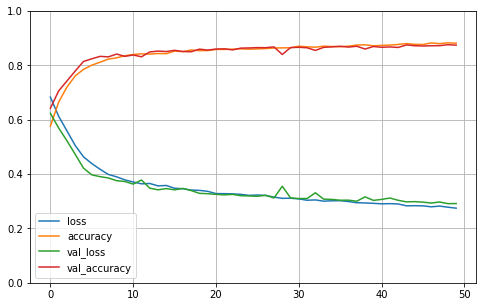

MODEL
make_DNN
input shape: (7, 12, 1)
FIT
Epoch 1/50
400/400 [==============================] - 3s 4ms/step - loss: 0.7195 - accuracy: 0.5180 - val_loss: 0.6341 - val_accuracy: 0.6241
Epoch 2/50
400/400 [==============================] - 2s 4ms/step - loss: 0.6321 - accuracy: 0.6427 - val_loss: 0.5739 - val_accuracy: 0.7259
Epoch 3/50
400/400 [==============================] - 1s 3ms/step - loss: 0.5773 - accuracy: 0.7018 - val_loss: 0.5332 - val_accuracy: 0.7578
Epoch 4/50
400/400 [==============================] - 2s 4ms/step - loss: 0.5399 - accuracy: 0.7361 - val_loss: 0.4855 - val_accuracy: 0.7806
Epoch 5/50
400/400 [==============================] - 1s 4ms/step - loss: 0.4904 - accuracy: 0.7710 - val_loss: 0.4346 - val_accuracy: 0.8141
Epoch 6/50
400/400 [==============================] - 2s 4ms/step - loss: 0.4641 - accuracy: 0.7802 - val_loss: 0.4307 - val_accuracy: 0.8131
Epoch 7/50
400/400 [==============================] - 2s 4ms/step - loss: 0.4394 - accuracy: 0.7915 - val

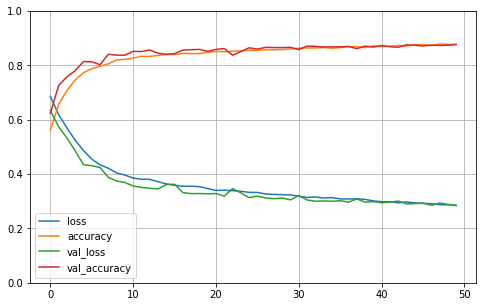

MODEL
make_DNN
input shape: (7, 12, 1)
FIT
Epoch 1/50
400/400 [==============================] - 3s 5ms/step - loss: 0.7147 - accuracy: 0.5348 - val_loss: 0.6273 - val_accuracy: 0.6522
Epoch 2/50
400/400 [==============================] - 1s 3ms/step - loss: 0.6259 - accuracy: 0.6420 - val_loss: 0.5649 - val_accuracy: 0.7287
Epoch 3/50
400/400 [==============================] - 2s 4ms/step - loss: 0.5646 - accuracy: 0.7194 - val_loss: 0.5160 - val_accuracy: 0.7616
Epoch 4/50
400/400 [==============================] - 1s 3ms/step - loss: 0.5148 - accuracy: 0.7584 - val_loss: 0.4707 - val_accuracy: 0.7797
Epoch 5/50
400/400 [==============================] - 2s 4ms/step - loss: 0.4718 - accuracy: 0.7819 - val_loss: 0.4396 - val_accuracy: 0.8025
Epoch 6/50
400/400 [==============================] - 1s 4ms/step - loss: 0.4367 - accuracy: 0.8021 - val_loss: 0.4159 - val_accuracy: 0.8147
Epoch 7/50
400/400 [==============================] - 1s 4ms/step - loss: 0.4178 - accuracy: 0.8106 - val

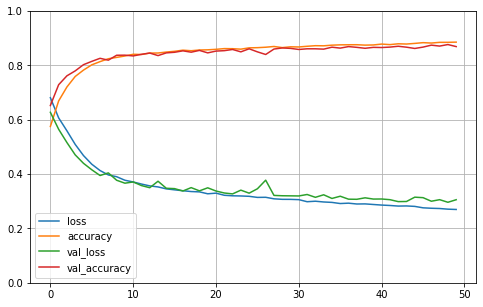

MODEL
make_DNN
input shape: (7, 12, 1)
FIT
Epoch 1/50
400/400 [==============================] - 3s 5ms/step - loss: 0.7099 - accuracy: 0.5365 - val_loss: 0.6169 - val_accuracy: 0.6550
Epoch 2/50
400/400 [==============================] - 1s 4ms/step - loss: 0.6122 - accuracy: 0.6645 - val_loss: 0.5564 - val_accuracy: 0.7312
Epoch 3/50
400/400 [==============================] - 2s 4ms/step - loss: 0.5704 - accuracy: 0.7117 - val_loss: 0.5154 - val_accuracy: 0.7584
Epoch 4/50
400/400 [==============================] - 1s 4ms/step - loss: 0.5468 - accuracy: 0.7368 - val_loss: 0.4693 - val_accuracy: 0.7922
Epoch 5/50
400/400 [==============================] - 1s 4ms/step - loss: 0.5047 - accuracy: 0.7603 - val_loss: 0.4287 - val_accuracy: 0.8097
Epoch 6/50
400/400 [==============================] - 1s 4ms/step - loss: 0.4745 - accuracy: 0.7789 - val_loss: 0.4098 - val_accuracy: 0.8256
Epoch 7/50
400/400 [==============================] - 1s 4ms/step - loss: 0.4449 - accuracy: 0.7929 - val

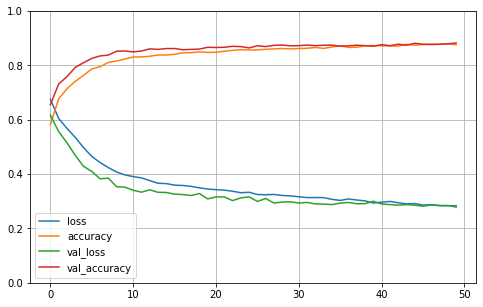

MODEL
make_DNN
input shape: (7, 12, 1)
FIT
Epoch 1/50
400/400 [==============================] - 3s 4ms/step - loss: 0.7053 - accuracy: 0.5481 - val_loss: 0.6163 - val_accuracy: 0.6600
Epoch 2/50
400/400 [==============================] - 1s 4ms/step - loss: 0.6104 - accuracy: 0.6670 - val_loss: 0.5685 - val_accuracy: 0.7184
Epoch 3/50
400/400 [==============================] - 2s 4ms/step - loss: 0.5700 - accuracy: 0.7097 - val_loss: 0.5588 - val_accuracy: 0.7119
Epoch 4/50
400/400 [==============================] - 1s 4ms/step - loss: 0.5377 - accuracy: 0.7401 - val_loss: 0.4918 - val_accuracy: 0.7641
Epoch 5/50
400/400 [==============================] - 1s 4ms/step - loss: 0.4834 - accuracy: 0.7745 - val_loss: 0.4332 - val_accuracy: 0.8106
Epoch 6/50
400/400 [==============================] - 2s 4ms/step - loss: 0.4590 - accuracy: 0.7881 - val_loss: 0.4092 - val_accuracy: 0.8159
Epoch 7/50
400/400 [==============================] - 1s 4ms/step - loss: 0.4273 - accuracy: 0.8070 - val

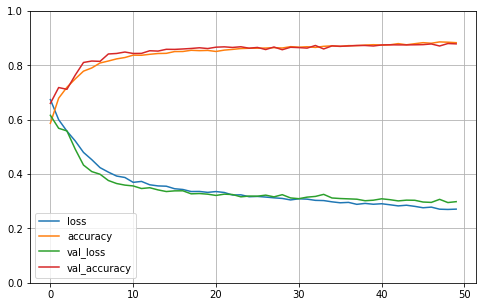

INFO:tensorflow:Assets written to: /content/drive/My Drive/data/LastModel/assets


In [15]:
show_time()
last_model = do_cross_validation(Xfrq2D,y,SHAPE2D)
last_model.save(LASTMODELPATH)

## Test the neural network

In [16]:
show_time()
model = load_model(BESTMODELPATH)
Xseq,y=prepare_x_and_y(pc_test,nc_test)  # test sequences
Xfrq=seqs_to_kmer_freqs(Xseq,MAX_K)      # converted to K-mer frequencies
X = reshape(Xfrq)                        # and formatted as 2D matrix
show_time()

2021-08-09 17:35:19 UTC
2021-08-09 17:35:23 UTC


In [17]:
scores = model.evaluate(X, y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 87.83%


## Apply the network to specific data sets

In [18]:
def prepare_one(seqs1,label):
    len1=len(seqs1)
    if label==1:
        L1=np.ones(len1,dtype=np.int8)
    else:
        L1=np.zeros(len1,dtype=np.int8)
    Xfrq=seqs_to_kmer_freqs(seqs1,MAX_K)      # converted to K-mer frequencies
    return Xfrq,L1


In [19]:
print("The protein coding test set...")
Xfrq,y = prepare_one(pc_test,1)
rows=7
cols=FRQ_CNT//rows
seq_cnt,old_rows=Xfrq.shape 
X = Xfrq.reshape(seq_cnt,rows,cols,1)

scores = model.evaluate(X, y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
pc_bm_probs = model.predict(X)

The protein coding test set...
accuracy: 87.75%


In [20]:
print("The non coding test set...")
Xfrq,y = prepare_one(nc_test,1)
rows=7
cols=FRQ_CNT//rows
seq_cnt,old_rows=Xfrq.shape 
X = Xfrq.reshape(seq_cnt,rows,cols,1)

scores = model.evaluate(X, y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
nc_bm_probs = model.predict(X)

The non coding test set...
accuracy: 12.10%


In [21]:
print("The sequences of interest...")
Xfrq,y = prepare_one(selectedX,41)  # don't use second parameter; set y on next line
y = np.asarray(selectedY)
rows=7
cols=FRQ_CNT//rows
seq_cnt,old_rows=Xfrq.shape 
X = Xfrq.reshape(seq_cnt,rows,cols,1)


scores = model.evaluate(X, y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
int_bm_probs = model.predict(X)

The sequences of interest...
accuracy: 75.00%


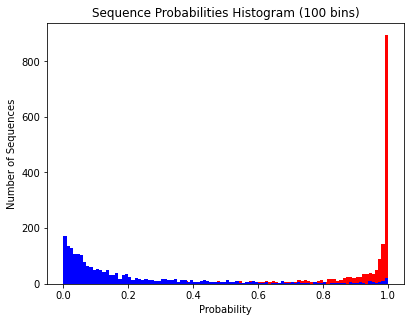

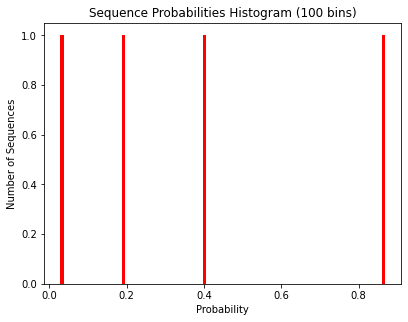

In [23]:
pc_probs = np.asarray([e[0] for e in pc_bm_probs])
nc_probs = np.asarray([e[0] for e in nc_bm_probs])
int_probs = np.asarray([e[0] for e in int_bm_probs])

pg = PlotGenerator()
pg.set_text_options(90, 'right', 0, 'center', 12)
pg.set_text('Sequence Probabilities Histogram (100 bins)', 'Probability', 'Number of Sequences', None, None)

pg.histogram([pc_probs, nc_probs], 100)
pg.histogram([int_probs], 100)